# 데이터분석기초 텀프로젝트
### Project 1

1. csv 파일을 Pandas DataFrame으로 받고, 수집 기간동안의 평균 소모 칼로리, 평균 이동거리, 평균 step수를 출력해 보세요.
2. x축은 date, y축은 calories로 꺾은선 그래프를 그려 보세요.
3. 이동한 거리(distance)와 소모된 칼로리(calories)와의 관계를 알아보고자 합니다. x축은 distance, y축은 calories로 scatter plotting해 보세요.
4. 요일 별로 소모 칼로리, 이동거리, 평균 steps 수를 분석해 보고 나름대로의 결론을 내려보세요.

#### Read Fitbit_data.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("csv_files/fitbit_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       167 non-null    object 
 1   calories   167 non-null    float64
 2   distances  167 non-null    float64
 3   steps      167 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [2]:
df = pd.DataFrame(df)

In [3]:
df.shape

(167, 4)

In [4]:
df.describe()

,calories,distances,steps
count,167.000000,167.000000,167.000000
mean,1828.557846,2.831138,3942.784431
std,432.794178,3.029683,4222.034919
min,319.720000,0.000000,0.000000
25%,1527.600000,0.000000,0.000000
50%,1751.850000,2.020000,2828.000000
75%,2094.385000,5.040000,7035.500000
max,3552.730000,13.790000,19259.000000


#### fitbit_data.csv 파일은 ['data', 'calories','distances','steps']를 가지고 있으며 167개의 행과 4개의 열로 존재한다.

#### 결측치가 존재하지 않는다.

In [5]:
df.isnull().sum()

date         0
calories     0
distances    0
steps        0
dtype: int64

In [6]:
df.corr() #표준상관계수

,calories,distances,steps
calories,1.000000,0.913822,0.913989
distances,0.913822,1.000000,0.999781
steps,0.913989,0.999781,1.000000


In [7]:
df1 = df.copy()
df1

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
...,...,...,...,...
162,2021.11.10,2498.06,5.660000,7912
163,2021.11.11,2732.86,9.000000,12536
164,2021.11.12,2774.22,6.450000,8985
165,2021.11.13,2954.84,7.710000,10621


#### distances와 steps에서 0값이 많아 평균을 냈을 때 좋은 값이 나오지 않았다.  

In [8]:
df.mean()

calories     1828.557846
distances       2.831138
steps        3942.784431
dtype: float64

### distances가 0 일 때의 행을 지웠다

In [9]:
df2 = df1[df1['distances']==0].index
df2

Int64Index([ 29,  31,  39,  40,  43,  44,  49,  53,  54,  55,  56,  57,  58,
             59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
             72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  87,  88,
             91, 116, 117, 122, 123, 135, 136, 137, 138, 139, 140, 141, 145,
            146, 147, 148, 149, 150, 151, 152, 159, 166],
           dtype='int64')

In [10]:
df2.shape

(61,)

In [11]:
df3 = df1.drop(df2)
df3

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
...,...,...,...,...
161,2021.11.9,1726.78,1.050000,1462
162,2021.11.10,2498.06,5.660000,7912
163,2021.11.11,2732.86,9.000000,12536
164,2021.11.12,2774.22,6.450000,8985


In [12]:
df3 = df3.reset_index(drop=True)
df3

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
...,...,...,...,...
101,2021.11.9,1726.78,1.050000,1462
102,2021.11.10,2498.06,5.660000,7912
103,2021.11.11,2732.86,9.000000,12536
104,2021.11.12,2774.22,6.450000,8985


In [13]:
df3 = df1.drop(df2)
df3 = df3.reset_index(drop=True)
df3

,date,calories,distances,steps
0,2021.4.7,1744.27,7.300000,10174
1,2021.4.8,1865.11,3.460000,4829
2,2021.4.9,2406.20,5.920000,8262
3,2021.4.10,2384.56,6.350000,8864
4,2021.4.11,2456.50,6.059999,8467
...,...,...,...,...
101,2021.11.9,1726.78,1.050000,1462
102,2021.11.10,2498.06,5.660000,7912
103,2021.11.11,2732.86,9.000000,12536
104,2021.11.12,2774.22,6.450000,8985


### distances가 0일때의 행을 지웠더니 106행 4열이 되었다.

In [14]:
df3['distances'].max()

13.79

In [15]:
df3['distances'].min()

0.01

In [16]:
df.mean()

calories     1828.557846
distances       2.831138
steps        3942.784431
dtype: float64

In [17]:
df3.mean()

calories     2046.708398
distances       4.460377
steps        6211.613208
dtype: float64

In [18]:
df3.describe()

,calories,distances,steps
count,106.000000,106.000000,106.000000
mean,2046.708398,4.460377,6211.613208
std,385.531993,2.678673,3735.586769
min,922.160200,0.010000,10.000000
25%,1835.030000,2.802500,3492.250000
50%,2044.855000,4.390000,6066.500000
75%,2250.795000,6.135000,8560.000000
max,3552.730000,13.790000,19259.000000


In [19]:
df3.shape

(106, 4)

<AxesSubplot:>

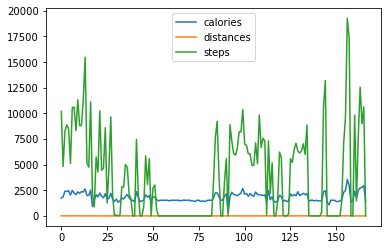

In [20]:
df.plot()

<AxesSubplot:>

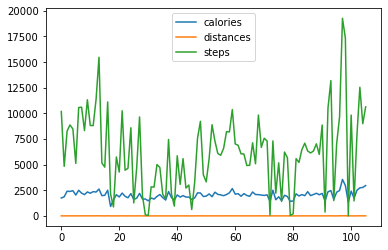

In [21]:
df3.plot()

### distances의 최대값은 13.79, 최소값은 0.01이 되었다.
### 다른 값들과 차이가 많이나 distances를 km->m로 변환하기 위해 1000을 곱한다.

In [22]:
df3['distances(m)'] = df3['distances']*1000
df_m = df3.copy()
df_m = df_m.drop(columns = ['distances'],axis=1)
df_m

,date,calories,steps,distances(m)
0,2021.4.7,1744.27,10174,7300.000
1,2021.4.8,1865.11,4829,3460.000
2,2021.4.9,2406.20,8262,5920.000
3,2021.4.10,2384.56,8864,6350.000
4,2021.4.11,2456.50,8467,6059.999
...,...,...,...,...
101,2021.11.9,1726.78,1462,1050.000
102,2021.11.10,2498.06,7912,5660.000
103,2021.11.11,2732.86,12536,9000.000
104,2021.11.12,2774.22,8985,6450.000


In [23]:
df_m.mean()

calories        2046.708398
steps           6211.613208
distances(m)    4460.377349
dtype: float64

## 0값일 경우도 동일하게 비교하기 위해 단위를 맞춰준다.

In [24]:
df1['distances(m)'] = df1['distances']*1000
df_n = df1.copy()
df_n = df_n.drop(columns = ['distances'],axis=1)
df_n

,date,calories,steps,distances(m)
0,2021.4.7,1744.27,10174,7300.000
1,2021.4.8,1865.11,4829,3460.000
2,2021.4.9,2406.20,8262,5920.000
3,2021.4.10,2384.56,8864,6350.000
4,2021.4.11,2456.50,8467,6059.999
...,...,...,...,...
162,2021.11.10,2498.06,7912,5660.000
163,2021.11.11,2732.86,12536,9000.000
164,2021.11.12,2774.22,8985,6450.000
165,2021.11.13,2954.84,10621,7710.000


In [25]:
df_n.mean()

calories        1828.557846
steps           3942.784431
distances(m)    2831.137719
dtype: float64

## 1. 수집 기간동안의 평균 소모 칼로리, 평균 이동거리, 평균 step수를 출력

#### CSV 파일 값 그대로 평균 출력 시 
### calories:  1828.557846,  distances :  2.831138 , steps :  3942.784431

#### distances == 0 일 경우의 행을 제거하고, distances의 값이 다른 값의 범위가 크게 차이나서 1000을 곱하였다. 이때 평균 출력 시
### calories:  2046.708398,   distances(m):  4460.377349, steps: 6211.613208

#####  * csv의 기존 distances의 단위를 km 라고 판단하였음

## 2. x축: date, y축: calories => 꺾은선 그래프

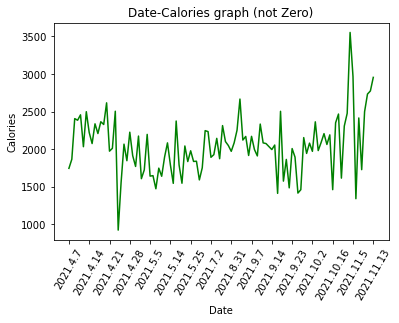

In [26]:
t=df_m.date
x=np.arange(t.size)

#plt.figure(figsize=(10,8))
plt.plot(x,df_m.calories,color='g')
plt.title('Date-Calories graph (not Zero)')
plt.xticks(x[::7],labels=t[::7],rotation=60)
plt.xlabel('Date')
plt.ylabel('Calories')
plt.show()

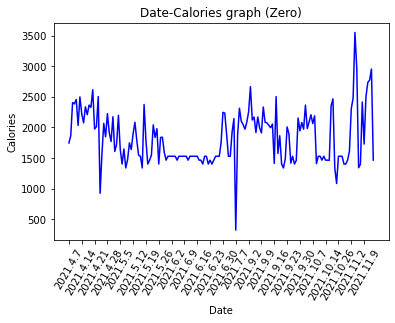

In [27]:
t=df_n.date
x=np.arange(t.size)

#plt.figure(figsize=(10,8))
plt.plot(x,df_n.calories,color='b')
plt.title('Date-Calories graph (Zero)')
plt.xticks(x[::7],labels=t[::7],rotation=60)
plt.xlabel('Date')
plt.ylabel('Calories')
plt.show()

## 3. 이동한 거리와 소모된 칼로리 관계
x축은 distance, y축은 calories로 scatter plotting해 보세요.

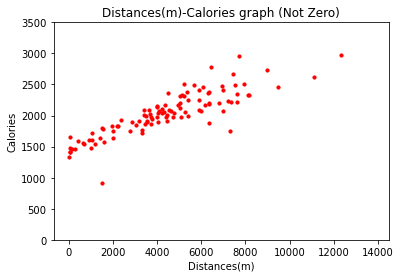

In [28]:
t = df_m['distances(m)']

plt.scatter(t,df_m.calories,s=10,color='r')
plt.ylim(0,3500)
plt.title('Distances(m)-Calories graph (Not Zero)')
plt.xlabel('Distances(m)')
plt.ylabel('Calories')
plt.show()

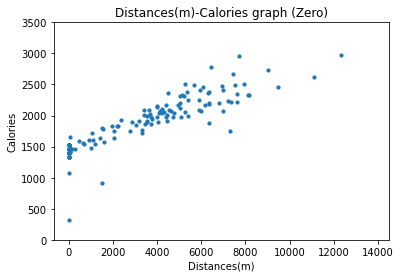

In [93]:
t = df_n['distances(m)']

plt.scatter(t,df_n.calories,s=10)
plt.ylim(0,3500)
plt.title('Distances(m)-Calories graph (Zero)')
plt.xlabel('Distances(m)')
plt.ylabel('Calories')
plt.show()

## 4. 요일 별로 평균 소모 칼로리, 평균 이동거리, 평균 steps 수를 분석

## 0값을 제거하였을 경우

In [30]:
pd.to_datetime(df_m['date'])
df_m['date_datetime'] = pd.to_datetime(df_m['date'])
df_m['date_week'] =df_m['date_datetime'].dt.day_name()
df_m

,date,calories,steps,distances(m),date_datetime,date_week
0,2021.4.7,1744.27,10174,7300.000,2021-04-07,Wednesday
1,2021.4.8,1865.11,4829,3460.000,2021-04-08,Thursday
2,2021.4.9,2406.20,8262,5920.000,2021-04-09,Friday
3,2021.4.10,2384.56,8864,6350.000,2021-04-10,Saturday
4,2021.4.11,2456.50,8467,6059.999,2021-04-11,Sunday
...,...,...,...,...,...,...
101,2021.11.9,1726.78,1462,1050.000,2021-11-09,Tuesday
102,2021.11.10,2498.06,7912,5660.000,2021-11-10,Wednesday
103,2021.11.11,2732.86,12536,9000.000,2021-11-11,Thursday
104,2021.11.12,2774.22,8985,6450.000,2021-11-12,Friday


In [31]:
pd.to_datetime(df_m['date'])
df_m

,date,calories,steps,distances(m),date_datetime,date_week
0,2021.4.7,1744.27,10174,7300.000,2021-04-07,Wednesday
1,2021.4.8,1865.11,4829,3460.000,2021-04-08,Thursday
2,2021.4.9,2406.20,8262,5920.000,2021-04-09,Friday
3,2021.4.10,2384.56,8864,6350.000,2021-04-10,Saturday
4,2021.4.11,2456.50,8467,6059.999,2021-04-11,Sunday
...,...,...,...,...,...,...
101,2021.11.9,1726.78,1462,1050.000,2021-11-09,Tuesday
102,2021.11.10,2498.06,7912,5660.000,2021-11-10,Wednesday
103,2021.11.11,2732.86,12536,9000.000,2021-11-11,Thursday
104,2021.11.12,2774.22,8985,6450.000,2021-11-12,Friday


In [32]:
df_m['date_datetime'] = pd.to_datetime(df_m['date'])
df_m['date_week'] =df_m['date_datetime'].dt.day_name()
df_m

,date,calories,steps,distances(m),date_datetime,date_week
0,2021.4.7,1744.27,10174,7300.000,2021-04-07,Wednesday
1,2021.4.8,1865.11,4829,3460.000,2021-04-08,Thursday
2,2021.4.9,2406.20,8262,5920.000,2021-04-09,Friday
3,2021.4.10,2384.56,8864,6350.000,2021-04-10,Saturday
4,2021.4.11,2456.50,8467,6059.999,2021-04-11,Sunday
...,...,...,...,...,...,...
101,2021.11.9,1726.78,1462,1050.000,2021-11-09,Tuesday
102,2021.11.10,2498.06,7912,5660.000,2021-11-10,Wednesday
103,2021.11.11,2732.86,12536,9000.000,2021-11-11,Thursday
104,2021.11.12,2774.22,8985,6450.000,2021-11-12,Friday


In [33]:
df_m.drop(['date_datetime'],axis=1)

,date,calories,steps,distances(m),date_week
0,2021.4.7,1744.27,10174,7300.000,Wednesday
1,2021.4.8,1865.11,4829,3460.000,Thursday
2,2021.4.9,2406.20,8262,5920.000,Friday
3,2021.4.10,2384.56,8864,6350.000,Saturday
4,2021.4.11,2456.50,8467,6059.999,Sunday
...,...,...,...,...,...
101,2021.11.9,1726.78,1462,1050.000,Tuesday
102,2021.11.10,2498.06,7912,5660.000,Wednesday
103,2021.11.11,2732.86,12536,9000.000,Thursday
104,2021.11.12,2774.22,8985,6450.000,Friday


In [34]:
df_week = df_m.groupby('date_week').mean()
df_week

,calories,steps,distances(m)
date_week,,,
Friday,2203.867059,7382.823529,5288.823529
Monday,2009.444286,6097.285714,4376.428643
Saturday,1850.096888,4461.062500,3201.249937
Sunday,2034.847500,5840.666667,4164.166667
Thursday,2125.840667,6761.466667,4888.666667
Tuesday,2047.455000,6239.125000,4491.874937
Wednesday,2042.907500,6553.000000,4701.875000


In [35]:
df_week=df_week.reindex(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_week

,calories,steps,distances(m)
date_week,,,
Monday,2009.444286,6097.285714,4376.428643
Tuesday,2047.455000,6239.125000,4491.874937
Wednesday,2042.907500,6553.000000,4701.875000
Thursday,2125.840667,6761.466667,4888.666667
Friday,2203.867059,7382.823529,5288.823529
Saturday,1850.096888,4461.062500,3201.249937
Sunday,2034.847500,5840.666667,4164.166667


In [36]:
df_week=df_week.rename(index={'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat','Sunday':'Sun'})
df_week

,calories,steps,distances(m)
date_week,,,
Mon,2009.444286,6097.285714,4376.428643
Tue,2047.455000,6239.125000,4491.874937
Wed,2042.907500,6553.000000,4701.875000
Thu,2125.840667,6761.466667,4888.666667
Fri,2203.867059,7382.823529,5288.823529
Sat,1850.096888,4461.062500,3201.249937
Sun,2034.847500,5840.666667,4164.166667


In [37]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mon to Sun
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      7 non-null      float64
 1   steps         7 non-null      float64
 2   distances(m)  7 non-null      float64
dtypes: float64(3)
memory usage: 224.0+ bytes


In [38]:
df_week.isnull().sum()

calories        0
steps           0
distances(m)    0
dtype: int64

In [39]:
from pandas import DataFrame
df_week=DataFrame(df_week)
df_week

,calories,steps,distances(m)
date_week,,,
Mon,2009.444286,6097.285714,4376.428643
Tue,2047.455000,6239.125000,4491.874937
Wed,2042.907500,6553.000000,4701.875000
Thu,2125.840667,6761.466667,4888.666667
Fri,2203.867059,7382.823529,5288.823529
Sat,1850.096888,4461.062500,3201.249937
Sun,2034.847500,5840.666667,4164.166667


In [40]:
df_week.describe()

,calories,steps,distances(m)
count,7.000000,7.000000,7.000000
mean,2044.922700,6190.775725,4444.726483
std,108.887423,913.184426,659.234831
min,1850.096888,4461.062500,3201.249937
25%,2022.145893,5968.976190,4270.297655
50%,2042.907500,6239.125000,4491.874937
75%,2086.647833,6657.233333,4795.270833
max,2203.867059,7382.823529,5288.823529


In [59]:
x = df_week.index
y1 = df_week['calories']
y2 = df_week['distances(m)']
y3 = df_week['steps']

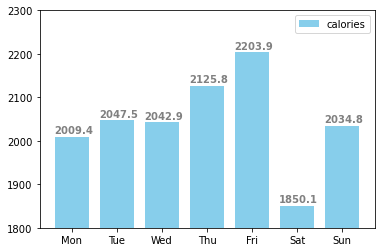

<Figure size 432x288 with 0 Axes>

In [60]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x, y1, width, color="skyblue",label='calories')
ax.set_ylim(1800,2300)

for v, i in enumerate(y1):
    ax.text(v-.40, i+8, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()

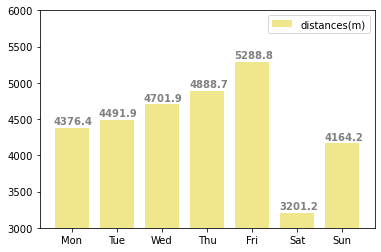

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x, y2, width, color="khaki",label='distances(m)')
ax.set_ylim(3000,6000)

for v, i in enumerate(y2):
    ax.text(v-.40, i+50, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()

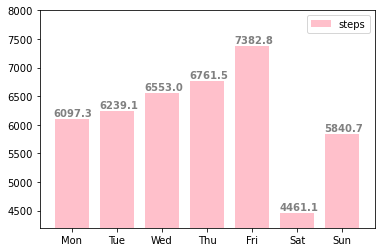

<Figure size 432x288 with 0 Axes>

In [62]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x, y3, width, color="pink",label='steps')
ax.set_ylim(4200,8000)

for v, i in enumerate(y3):
    ax.text(v-.40, i+50, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()

## 0값을 제거하지 않았을 경우

In [63]:
pd.to_datetime(df_n['date'])
df_n['date_datetime'] = pd.to_datetime(df_n['date'])
df_n['date_week'] =df_n['date_datetime'].dt.day_name()
df_n

,date,calories,steps,distances(m),date_datetime,date_week
0,2021.4.7,1744.27,10174,7300.000,2021-04-07,Wednesday
1,2021.4.8,1865.11,4829,3460.000,2021-04-08,Thursday
2,2021.4.9,2406.20,8262,5920.000,2021-04-09,Friday
3,2021.4.10,2384.56,8864,6350.000,2021-04-10,Saturday
4,2021.4.11,2456.50,8467,6059.999,2021-04-11,Sunday
...,...,...,...,...,...,...
162,2021.11.10,2498.06,7912,5660.000,2021-11-10,Wednesday
163,2021.11.11,2732.86,12536,9000.000,2021-11-11,Thursday
164,2021.11.12,2774.22,8985,6450.000,2021-11-12,Friday
165,2021.11.13,2954.84,10621,7710.000,2021-11-13,Saturday


In [64]:
pd.to_datetime(df_n['date'])
df_n

,date,calories,steps,distances(m),date_datetime,date_week
0,2021.4.7,1744.27,10174,7300.000,2021-04-07,Wednesday
1,2021.4.8,1865.11,4829,3460.000,2021-04-08,Thursday
2,2021.4.9,2406.20,8262,5920.000,2021-04-09,Friday
3,2021.4.10,2384.56,8864,6350.000,2021-04-10,Saturday
4,2021.4.11,2456.50,8467,6059.999,2021-04-11,Sunday
...,...,...,...,...,...,...
162,2021.11.10,2498.06,7912,5660.000,2021-11-10,Wednesday
163,2021.11.11,2732.86,12536,9000.000,2021-11-11,Thursday
164,2021.11.12,2774.22,8985,6450.000,2021-11-12,Friday
165,2021.11.13,2954.84,10621,7710.000,2021-11-13,Saturday


In [65]:
df_n.drop(['date_datetime'],axis=1)

,date,calories,steps,distances(m),date_week
0,2021.4.7,1744.27,10174,7300.000,Wednesday
1,2021.4.8,1865.11,4829,3460.000,Thursday
2,2021.4.9,2406.20,8262,5920.000,Friday
3,2021.4.10,2384.56,8864,6350.000,Saturday
4,2021.4.11,2456.50,8467,6059.999,Sunday
...,...,...,...,...,...
162,2021.11.10,2498.06,7912,5660.000,Wednesday
163,2021.11.11,2732.86,12536,9000.000,Thursday
164,2021.11.12,2774.22,8985,6450.000,Friday
165,2021.11.13,2954.84,10621,7710.000,Saturday


In [69]:
df_week0 = df_n.groupby('date_week').mean()
df_week0

,calories,steps,distances(m)
date_week,,,
Friday,1988.057917,5229.500000,3746.250000
Monday,1771.546667,3556.750000,2552.916708
Saturday,1716.314592,2974.625000,2134.166625
Sunday,1767.989583,2920.333333,2082.083333
Thursday,1895.617826,4409.652174,3188.260870
Tuesday,1850.301250,4159.416667,2994.583292
Wednesday,1812.871250,4368.666667,3134.583333


In [70]:
df_week0=df_week0.reindex(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_week0

,calories,steps,distances(m)
date_week,,,
Monday,1771.546667,3556.750000,2552.916708
Tuesday,1850.301250,4159.416667,2994.583292
Wednesday,1812.871250,4368.666667,3134.583333
Thursday,1895.617826,4409.652174,3188.260870
Friday,1988.057917,5229.500000,3746.250000
Saturday,1716.314592,2974.625000,2134.166625
Sunday,1767.989583,2920.333333,2082.083333


In [71]:
df_week0=df_week0.rename(index={'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat','Sunday':'Sun'})
df_week0

,calories,steps,distances(m)
date_week,,,
Mon,1771.546667,3556.750000,2552.916708
Tue,1850.301250,4159.416667,2994.583292
Wed,1812.871250,4368.666667,3134.583333
Thu,1895.617826,4409.652174,3188.260870
Fri,1988.057917,5229.500000,3746.250000
Sat,1716.314592,2974.625000,2134.166625
Sun,1767.989583,2920.333333,2082.083333


In [72]:
df_week0=DataFrame(df_week0)
df_week0

,calories,steps,distances(m)
date_week,,,
Mon,1771.546667,3556.750000,2552.916708
Tue,1850.301250,4159.416667,2994.583292
Wed,1812.871250,4368.666667,3134.583333
Thu,1895.617826,4409.652174,3188.260870
Fri,1988.057917,5229.500000,3746.250000
Sat,1716.314592,2974.625000,2134.166625
Sun,1767.989583,2920.333333,2082.083333


In [73]:
df_week0.describe()

,calories,steps,distances(m)
count,7.000000,7.000000,7.000000
mean,1828.957012,3945.563406,2833.263452
std,91.444318,840.001498,606.628333
min,1716.314592,2920.333333,2082.083333
25%,1769.768125,3265.687500,2343.541667
50%,1812.871250,4159.416667,2994.583292
75%,1872.959538,4389.159420,3161.422101
max,1988.057917,5229.500000,3746.250000


In [78]:
x0 = df_week0.index
y01 = df_week0['calories']
y02 = df_week0['distances(m)']
y03 = df_week0['steps']

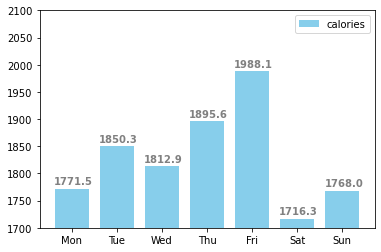

<Figure size 432x288 with 0 Axes>

In [79]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x0, y01, width, color="skyblue",label='calories')
ax.set_ylim(1700,2100)

for v, i in enumerate(y01):
    ax.text(v-.40, i+8, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()

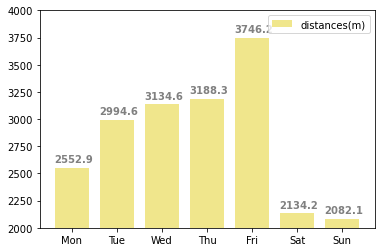

<Figure size 432x288 with 0 Axes>

In [92]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x0, y02, width, color="khaki",label='distances(m)')
ax.set_ylim(2000,4000)

for v, i in enumerate(y02):
    ax.text(v-.40, i+50, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()

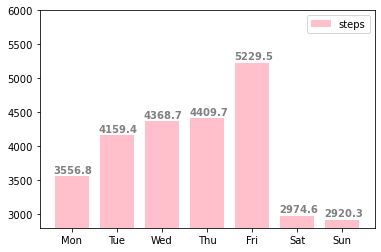

<Figure size 432x288 with 0 Axes>

In [91]:
fig, ax = plt.subplots() 
width = 0.75
plt.figure()
ax.bar(x0, y03, width, color="pink",label='steps')
ax.set_ylim(2800,6000)

for v, i in enumerate(y03):
    ax.text(v-.40, i+50, str(round(i,1)), color='gray', fontweight='bold')

ax.legend()